#Text Analytics | Assignment 2

Spyros Mastrodimitris Gounaropoulos 

Panagiota Tavoularea 

Panagiotis Antoniozas 

##Downloading, Importing & Understanding our Data Set

In [ ]:
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
!tar xvzf review_polarity.tar.gz

from sklearn.datasets import load_files  

#download the files
movies = load_files(container_path="txt_sentoken", encoding="utf-8")
 
#save the reviews and the annotations to x, y respectively 
x, y = movies.data, movies.target

--2023-02-27 07:51:29--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz’

review_polarity.tar 100%[===================>]   2.98M  11.6MB/s    in 0.3s    

2023-02-27 07:51:29 (11.6 MB/s) - ‘review_polarity.tar.gz’ saved [3127238/3127238]

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg/cv0

>Finding the Boolean Number for each Category

In [ ]:
#print the target names and the number of reviews
print("(y=0) corresptonds to -->",movies.target_names[0])
print("(y=1) corresptonds to-->",movies.target_names[1])

(y=0) corresptonds to --> neg
(y=1) corresptonds to--> pos


>Calculation of the Average Number of Characters per Review

In [ ]:
s=0
s1=0
s2=0
pos=0
neg=0
for i in range(len(x)):
  s+=len(x[i])
  if y[i]==0:
    pos+=1
    s1+=len(x[i])
  if y[i]==1:
    neg+=1
    s2+=len(x[i])

print("Number of Positive Reviews:",pos)
print("Number of Negative Reviews:",neg)
print("")
print("Average Number of Characters per Review:",round(s/len(x)))
print("Average Number of Characters per Positive Review:",round(s1/pos))
print("Average Number of Characters per Negative Review:",round(s2/neg))
print("")
print("The Number of Total Reviews:",len(x))

Number of Positive Reviews: 1000
Number of Negative Reviews: 1000

Average Number of Characters per Review: 3893
Average Number of Characters per Positive Review: 3662
Average Number of Characters per Negative Review: 4124

The Number of Total Reviews: 2000


In [ ]:
# First sample and target
print('Sample: {} \nTarget: {}'.format(x[0], y[0]))

Sample: arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes , the film is 

##  Preprocess Dataset

>Preprocess the Dataset

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
docs = []

for doc in x: 
    
    # Remove non-word (special) characters such as punctuation, numbers etc
    document = re.sub(r'\W', ' ', str(doc))

    # Remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
  
    #Remove all digits
    document = re.sub(" \d+", " ", document)

    # Substitute multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Convert to Lowercase
    document = document.lower()

    # Split the document based on whitespaces (--> List of words)
    document = document.split()
    
    # Lemmatization
    document = [stemmer.lemmatize(word) for word in document]
    
    # Reconstruct the document by joining the words on each whitespace
    document = ' '.join(document)

    # Append all documents into a list 'docs'
    docs.append(document)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


>Print a Sample Before and After Data Preprocessing

In [ ]:
from pprint import pprint

print("\nOriginal review text:\n")
pprint(format(x[0]))
print("\nFiltered review text:\n")
pprint(format(docs[0]))
print("\nLabel:\n", y[0])


Original review text:

('arnold schwarzenegger has been an icon for action enthusiasts , since the '
 "late 80's , but lately his films have been very sloppy and the one-liners "
 'are getting worse . \n'
 "it's hard seeing arnold as mr . freeze in batman and robin , especially when "
 "he says tons of ice jokes , but hey he got 15 million , what's it matter to "
 'him ? \n'
 'once again arnold has signed to do another expensive blockbuster , that '
 "can't compare with the likes of the terminator series , true lies and even "
 'eraser . \n'
 'in this so called dark thriller , the devil ( gabriel byrne ) has come upon '
 'earth , to impregnate a woman ( robin tunney ) which happens every 1000 '
 'years , and basically destroy the world , but apparently god has chosen one '
 'man , and that one man is jericho cane ( arnold himself ) . \n'
 'with the help of a trusty sidekick ( kevin pollack ) , they will stop at '
 'nothing to let the devil take over the world ! \n'
 'parts of this are

##Split The Data to Train, Test and Dev

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

# split the sentences to train, test, dev
xtrain,xtest,ytrain,ytest=train_test_split(docs,y, train_size=0.7,random_state=40)
xtrain,xdev,ytrain,ydev=train_test_split(xtrain,ytrain, train_size=0.7,random_state=40)

#show the reviews per data set
print("Number of Reviews in Train Set:",len(xtrain))
print("Number of Reviews in Test Set:",len(xtest))
print("Number of Reviews in Dev Set:",len(xdev))

Number of Reviews in Train Set: 979
Number of Reviews in Test Set: 600
Number of Reviews in Dev Set: 421


>Visualization of the Reviews Frequencies per Class Per Data Set

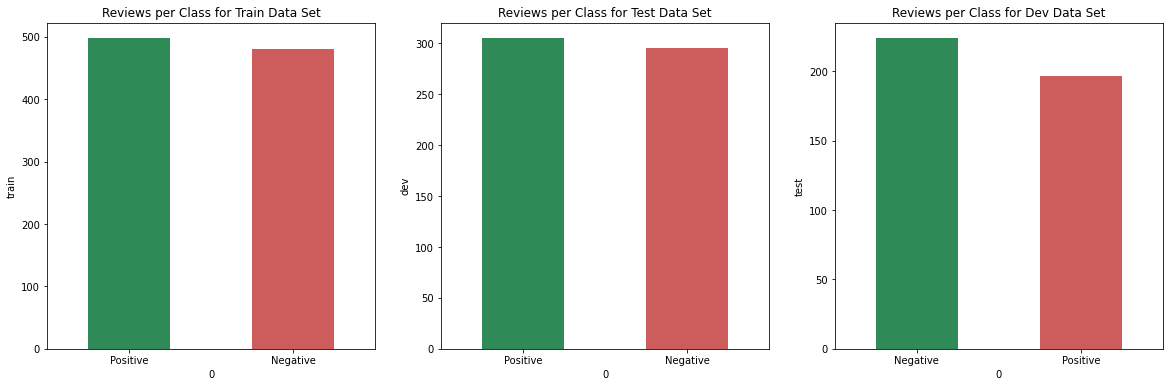

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

#convert data to dataframes
ytrain_for_plot = pd.DataFrame (ytrain)
ytest_for_plot = pd.DataFrame (ytest)
ydev_for_plot = pd.DataFrame (ydev)

#change dimentions  of the plot
fig, axs = plt.subplots(1, 3,figsize=(20,6))

#create the bar plots
tr = ytrain_for_plot.value_counts().plot(kind="bar", color=["seagreen", "indianred"], ylabel="train", ax=axs[0])
te = ytest_for_plot.value_counts().plot(kind="bar", color=["seagreen", "indianred"], ylabel="dev", ax=axs[1])
de = ydev_for_plot.value_counts().plot(kind="bar", color=["seagreen", "indianred"], ylabel="test", ax=axs[2])

#set the titles
tr.set_title("Reviews per Class for Train Data Set")
te.set_title("Reviews per Class for Test Data Set")
de.set_title("Reviews per Class for Dev Data Set")

#set the "x" labels
tr.set_xticklabels(['Positive', 'Negative'],rotation=0)
te.set_xticklabels(['Positive', 'Negative'],rotation=0)
de.set_xticklabels(['Negative', 'Positive'],rotation=0)

plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')

fig.show()

## TF-IDF n-gram Features Creation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Exclude stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(
    ngram_range = (1, 2), # unigrams and bigrams
    max_features = 5000, # we keep only the words that have TF<=threshold,
    sublinear_tf = True, # instead of TF/IDF --> (1+ log(TF))/IDF, 
    stop_words = stopwords.words('english')) # ignore english stopwords

# Fit Vectorizer on train data
# Transform on all data (train - test - dev)
xtrain_tfidf = vectorizer.fit_transform(xtrain)
xtest_tfidf = vectorizer.transform(xtest)
xdev_tfidf = vectorizer.transform(xdev)

#print for each data set it's reviews and features
print("")
print("Each data set reviews and features:")
print('Shape of Training Data: {}'.format(xtrain_tfidf.shape))
print('Shape of Test Data: {}'.format(xtest_tfidf.shape))
print('Shape of Dev Data: {}\n'.format(xdev_tfidf.shape))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Each data set reviews and features:
Shape of Training Data: (979, 5000)
Shape of Test Data: (600, 5000)
Shape of Dev Data: (421, 5000)



## Dimensionality Reduction for Data Visualization

<AxesSubplot:title={'center':'SVD Reduction'}>

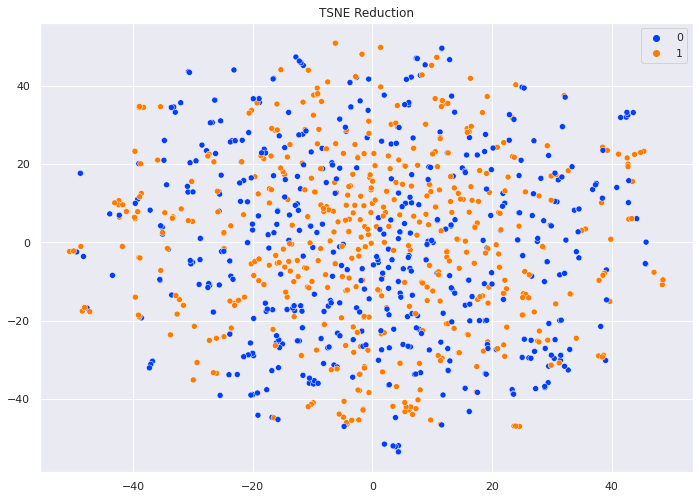

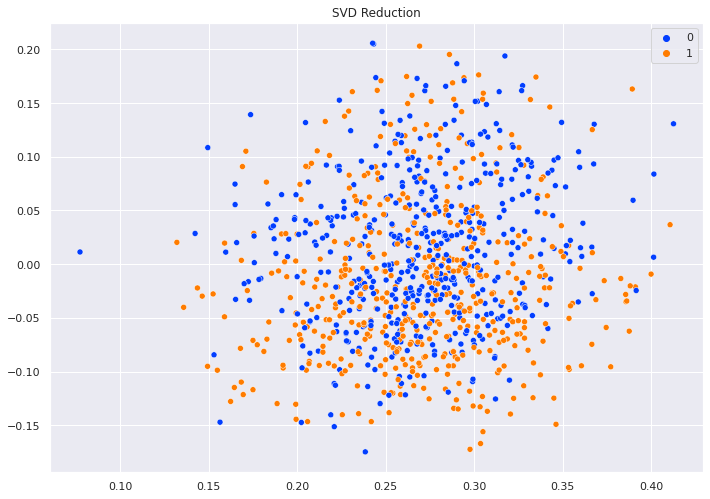

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD

sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)

# Dimensionality reduction using TSNE
tsne = TSNE(n_components=2, init="random", learning_rate=200, random_state=40)
x_train_trunc = tsne.fit_transform(xtrain_tfidf)

plt.figure()
plt.title('TSNE Reduction')
sns.scatterplot(x=x_train_trunc[:,0], y=x_train_trunc[:,1], hue=ytrain, legend='full', palette=palette)

# Dimensionality Reduction using SVD
svd = TruncatedSVD(n_components=2, random_state=4321)
x_train_trunc = svd.fit_transform(xtrain_tfidf)

plt.figure()
plt.title('SVD Reduction')
sns.scatterplot(x=x_train_trunc[:,0], y=x_train_trunc[:,1], hue=ytrain, legend='full', palette=palette)

## Feature Selection

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from sklearn.feature_selection import mutual_info_classif

# Number of features to keep
k = 2500

# Convert sparse matrix to np.array --> Slow
xtrain_tfidf_array = xtrain_tfidf.toarray()  

# The function relies on nonparametric methods 
# based on entropy estimation from k-nearest neighbors distances
mutual_information = mutual_info_classif(xtrain_tfidf_array, ytrain, n_neighbors=3, discrete_features=True, random_state=40)

# Indexes of the feature columns
indexes = np.arange(len(mutual_information))

# Sort by mutual information values --> (value, idx)
sorted_indexes = sorted(zip(mutual_information, indexes), reverse=True)
print('Sorted indexes: {}'.format(sorted_indexes[:4]))

# keep the indexes of the best k features
best_idxs = [idx for val, idx in sorted_indexes[:k]]
print('Best indexes: {}\n'.format(best_idxs[:4]))

# Keep only the colums of the best features
x_train_best_tfidf = xtrain_tfidf_array[:, best_idxs]
x_test_best_tfidf = xtest_tfidf[:, best_idxs]
x_dev_best_tfidf = xdev_tfidf[:, best_idxs]


# print for each data set it's reviews and features
print("")
print("Each Data Set Reviews and Features Before and After the Feature Selection Process:")
print('Shape of training data: {} --> {}'.format(xtrain_tfidf.shape, x_train_best_tfidf.shape))
print('Shape of test data: {} --> {}'.format(xtest_tfidf.shape, x_test_best_tfidf.shape))
print('Shape of dev data: {} --> {}\n'.format(xdev_tfidf.shape, x_dev_best_tfidf.shape))

Sorted indexes: [(0.6247459991359137, 1555), (0.6208589599886712, 3136), (0.5721129439220565, 2903), (0.5600634085655067, 1947)]
Best indexes: [1555, 3136, 2903, 1947]


Each Data Set Reviews and Features Before and After the Feature Selection Process:
Shape of training data: (979, 5000) --> (979, 2500)
Shape of test data: (600, 5000) --> (600, 2500)
Shape of dev data: (421, 5000) --> (421, 2500)



## Baseline Model

>Baseline Model Implemetation

Training took: 0.0003788471221923828 seconds 

Train f1-score: 67.43%
#Class 0 in Train dataset: (481,)
#Class 1 in Train dataset: (498,)

Confusion Matrix for train data:


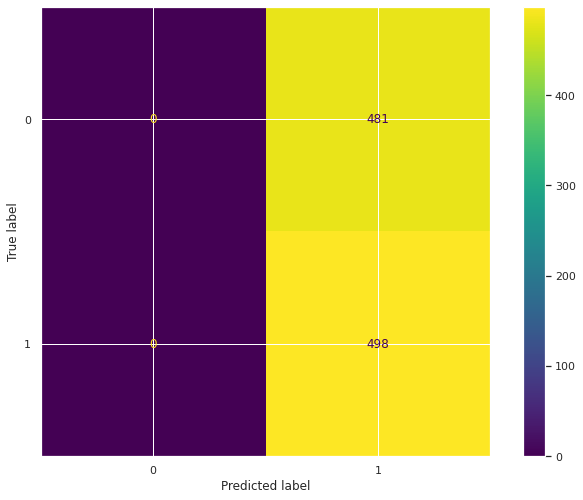

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import pandas as pd
import time

# Train
# The dummy classifier always predicts the 'most frequent' class
baseline = DummyClassifier(strategy='most_frequent',random_state=40)
start_time = time.time()
baseline.fit(xtrain_tfidf, ytrain)
print("Training took: {} seconds \n".format(time.time() - start_time))

# Evaluate
predictions = baseline.predict(xtrain_tfidf)
score = f1_score(ytrain, predictions)
print("Train f1-score: {:.2f}%".format(score*100))

print('#Class 0 in Train dataset:', np.where(ytrain == 0)[0].shape)
print('#Class 1 in Train dataset:', np.where(ytrain == 1)[0].shape)

print("\nConfusion Matrix for train data:")
ConfusionMatrixDisplay.from_estimator(baseline, xtrain_tfidf, ytrain, values_format = '.0f')

Test f1-score: 67.40% 
#Class 0 in Train dataset: (295,)
#Class 1 in Train dataset: (305,)

Confusion Matrix for test data:


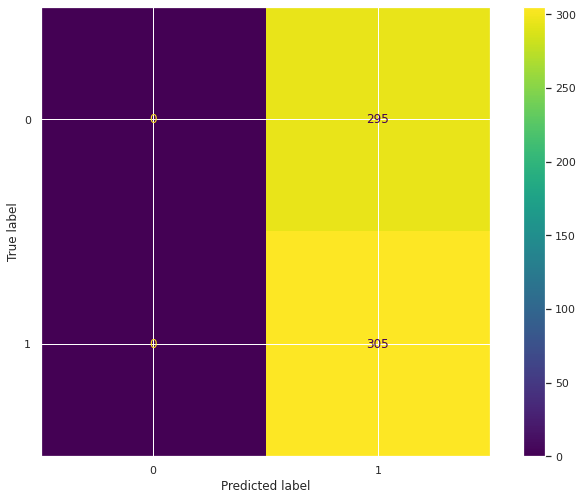

In [ ]:
predictions_test = baseline.predict(xtest_tfidf)
score = f1_score(ytest, predictions_test)
print("Test f1-score: {:.2f}% ".format(score*100))

print('#Class 0 in Train dataset:', np.where(ytest == 0)[0].shape)
print('#Class 1 in Train dataset:', np.where(ytest == 1)[0].shape)

print("\nConfusion Matrix for test data:")
ConfusionMatrixDisplay.from_estimator(baseline, xtest_tfidf, ytest, values_format = '.0f')

Dev f1-score: 63.75% 

#Class 0 in Train dataset: (224,)
#Class 1 in Train dataset: (197,)

Confusion Matrix for dev data:


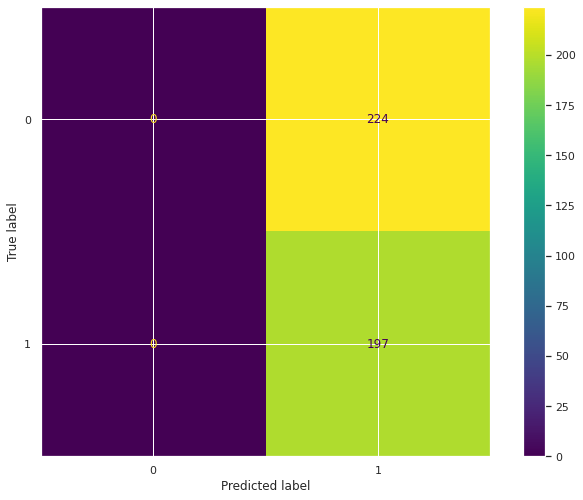

In [ ]:
predictions_dev = baseline.predict(xdev_tfidf)
score = f1_score(ydev,predictions_dev)
print("Dev f1-score: {:.2f}% \n".format(score*100))

print('#Class 0 in Train dataset:', np.where(ydev== 0)[0].shape)
print('#Class 1 in Train dataset:', np.where(ydev == 1)[0].shape)

print("\nConfusion Matrix for dev data:")
ConfusionMatrixDisplay.from_estimator(baseline, xdev_tfidf, ydev, values_format = '.0f')

>Classification Report per Data Set

In [ ]:
from sklearn import metrics

# print the classifiation report
print("Classification Report for Train Set: \n",metrics.classification_report(ytrain,predictions))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Test Set: \n",metrics.classification_report(ytest,predictions_test))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Dev Set: \n",metrics.classification_report(ydev,predictions_dev))

Classification Report for Train Set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       481
           1       0.51      1.00      0.67       498

    accuracy                           0.51       979
   macro avg       0.25      0.50      0.34       979
weighted avg       0.26      0.51      0.34       979

----------------------------------------------------------------------


Classification Report for Test Set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       295
           1       0.51      1.00      0.67       305

    accuracy                           0.51       600
   macro avg       0.25      0.50      0.34       600
weighted avg       0.26      0.51      0.34       600

----------------------------------------------------------------------


Classification Report for Dev Set: 
               precision    recall  f1-score   support

           0       0.00      0.

>Presision-Recall AUC Score (per Class and per Data Set) and Average Presision-Recall AUC Score Calculation (per Data Set)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#for train set
pred_train = baseline.predict_proba(xtrain_tfidf)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
auc_train_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
auc_train=(auc_train_neg+auc_train_pos)/2

print("(Train Set): Presision-Recall AUC Score for the Negative Class is:",auc_train_neg)
print("(Train Set): Presision-Recall AUC Score for the Positive Class is:",auc_train_pos)
print("(Train Set): Average Presision-Recall AUC Score is:",auc_train)


#for test set
pred_test = baseline.predict_proba(xtest_tfidf)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
auc_test=(auc_test_neg+auc_test_pos)/2
print("")
print("(Test Set): Presision-Recall AUC Score for the Negative Class is:",auc_test_neg)
print("(Test Set): Presision-Recall AUC Score for the Positive Class is:",auc_test_pos)
print("(Test Set): Average Presision-Recall AUC Score is:",auc_test)


#for dev set
pred_dev = baseline.predict_proba(xdev_tfidf)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
auc_dev=(auc_dev_neg+auc_dev_pos)/2
print("")
print("(Dev Set): Presision-Recall AUC Score for the Negative Class is:",auc_dev_neg)
print("(Dev Set): Presision-Recall AUC Score for the Positive Class is:",auc_dev_pos)
print("(Dev Set): Average Presision-Recall AUC Score is:",auc_dev)

(Train Set): Presision-Recall AUC Score for the Negative Class is: 0.7456588355464759
(Train Set): Presision-Recall AUC Score for the Positive Class is: 0.7543411644535241
(Train Set): Average Presision-Recall AUC Score is: 0.75

(Test Set): Presision-Recall AUC Score for the Negative Class is: 0.7458333333333333
(Test Set): Presision-Recall AUC Score for the Positive Class is: 0.7541666666666667
(Test Set): Average Presision-Recall AUC Score is: 0.75

(Dev Set): Presision-Recall AUC Score for the Negative Class is: 0.7660332541567696
(Dev Set): Presision-Recall AUC Score for the Positive Class is: 0.7339667458432304
(Dev Set): Average Presision-Recall AUC Score is: 0.75


###AUC Diagrams

AUC train set curves


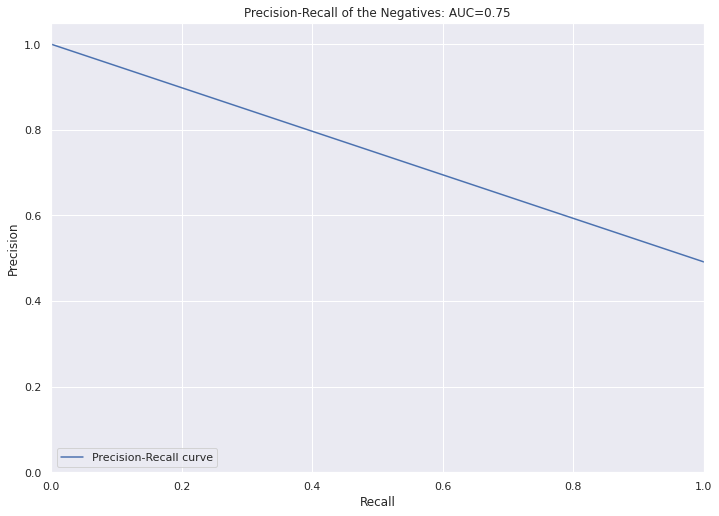

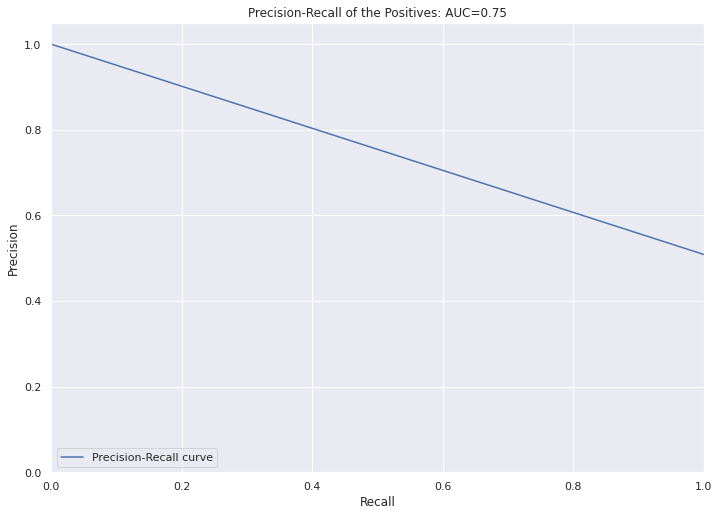

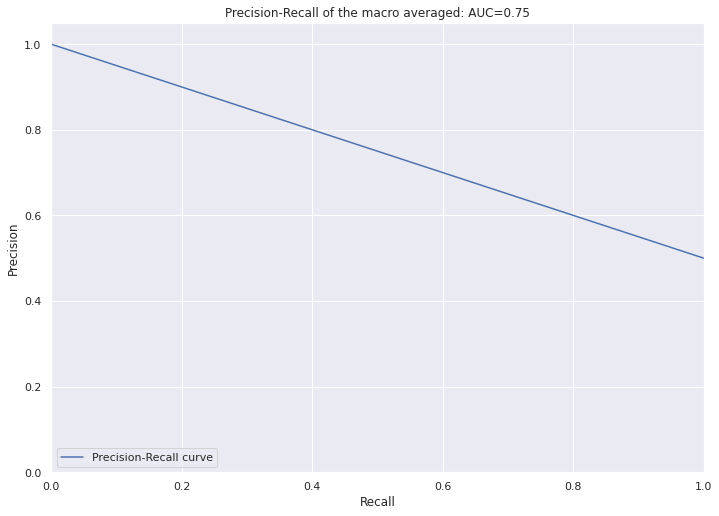

In [ ]:
# Precision-Recall train set curves
pred_train = baseline.predict_proba(xtrain_tfidf)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
p1 = precision
r1 = recall
auc_train_neg = auc(recall, precision)

print("AUC train set curves")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Negatives: AUC=%0.2f' % (auc_train_neg))
plt.legend(loc="lower left")
plt.show()

precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
p2 = precision
r2 = recall

print("")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Positives: AUC=%0.2f' % (auc_train_pos))
plt.legend(loc="lower left")
plt.show()

macroP=(p1+p2)/2
macroR=(r1+r2)/2
auc_train=(auc_train_neg+auc_train_pos)/2

print("")
plt.plot(macroR, macroP, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the macro averaged: AUC=%0.2f' % (auc_train))
plt.legend(loc="lower left")
plt.show()

AUC test set curves


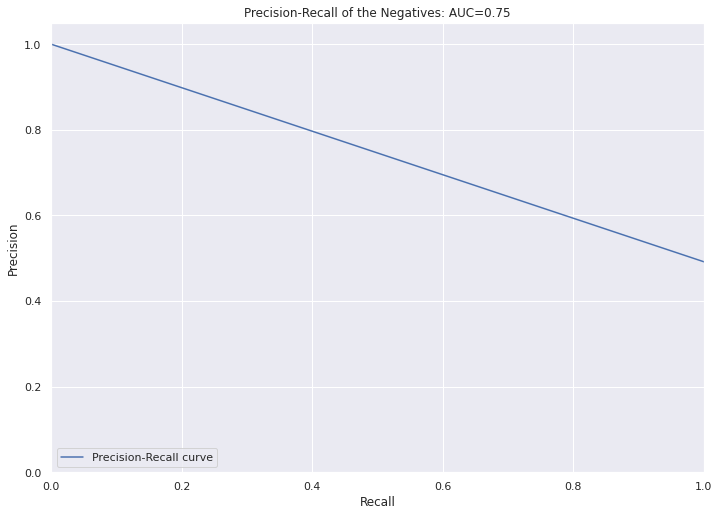

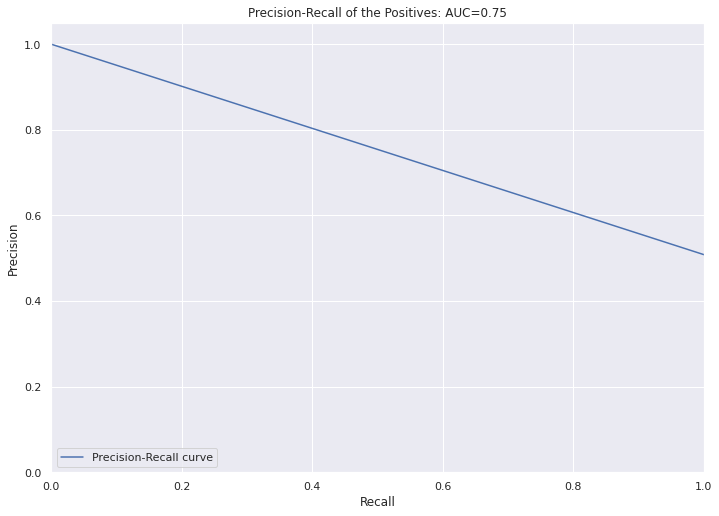

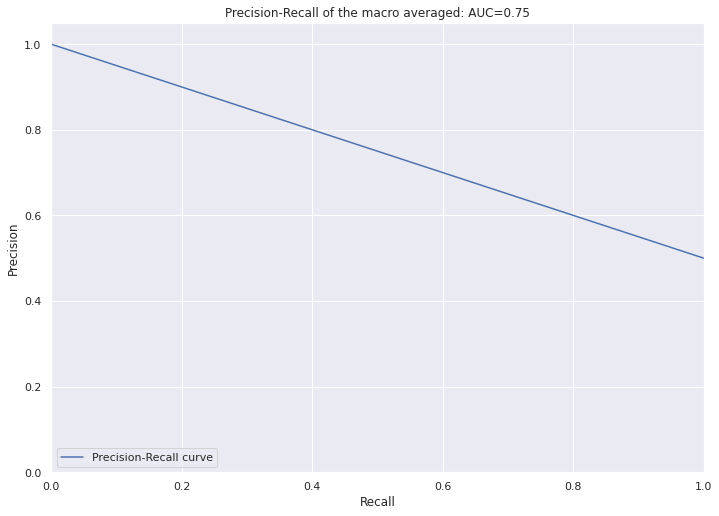

In [ ]:
# Precision-Recall test set curves
pred_test = baseline.predict_proba(xtest_tfidf)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)
p1 = precision
r1 = recall

print("AUC test set curves")

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Negatives: AUC=%0.2f' % (auc_test_neg))
plt.legend(loc="lower left")
plt.show()

precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
p2 = precision
r2 = recall

print("")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Positives: AUC=%0.2f' % (auc_test_pos))
plt.legend(loc="lower left")
plt.show()

macroP=(p1+p2)/2
macroR=(r1+r2)/2
auc_test=(auc_test_neg+auc_test_pos)/2

print("")
plt.plot(macroR, macroP, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the macro averaged: AUC=%0.2f' % (auc_test))
plt.legend(loc="lower left")
plt.show()

AUC dev set curves


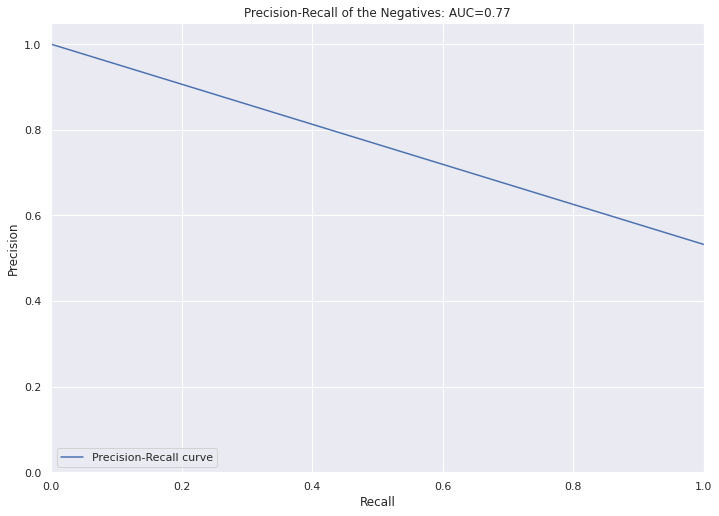

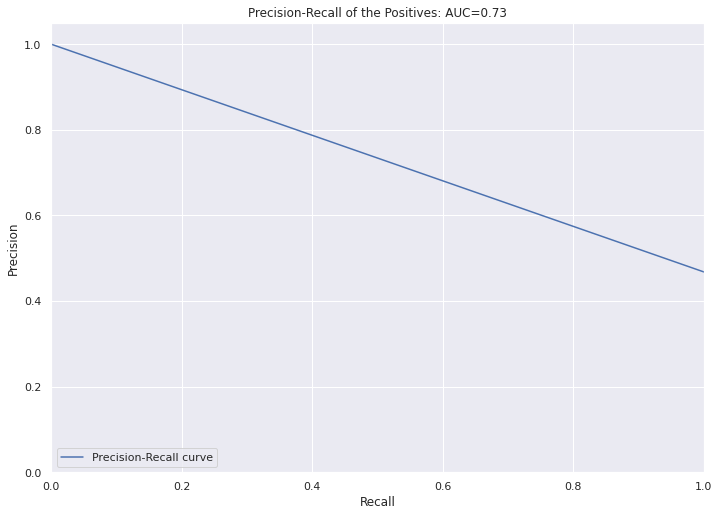

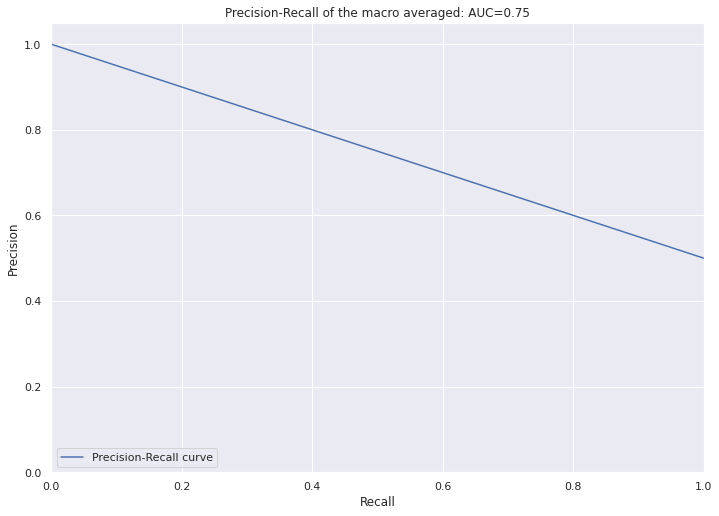

In [ ]:
# Precision-Recall dev set curves
pred_dev = baseline.predict_proba(xdev_tfidf)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)
p1 = precision
r1 = recall


print("AUC dev set curves")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Negatives: AUC=%0.2f' % (auc_dev_neg))
plt.legend(loc="lower left")
plt.show()

precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
p2 = precision
r2 = recall

print("")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Positives: AUC=%0.2f' % (auc_dev_pos))
plt.legend(loc="lower left")
plt.show()

macroP=(p1+p2)/2
macroR=(r1+r2)/2
auc_dev=(auc_dev_neg+auc_dev_pos)/2

print("")
plt.plot(macroR, macroP, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the macro averaged: AUC=%0.2f' % (auc_dev))
plt.legend(loc="lower left")
plt.show()

###Learning Curves

In [ ]:
# Learning curves with cross-validtion
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

def plot_learning_curve(estimator, title, score, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0,5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1-score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,scoring='f1', train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.show()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",label=score)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",label="Cross-validation score")
    plt.legend(loc="lower right")
    
    return plt

estimator = DummyClassifier(strategy='most_frequent',random_state=40)

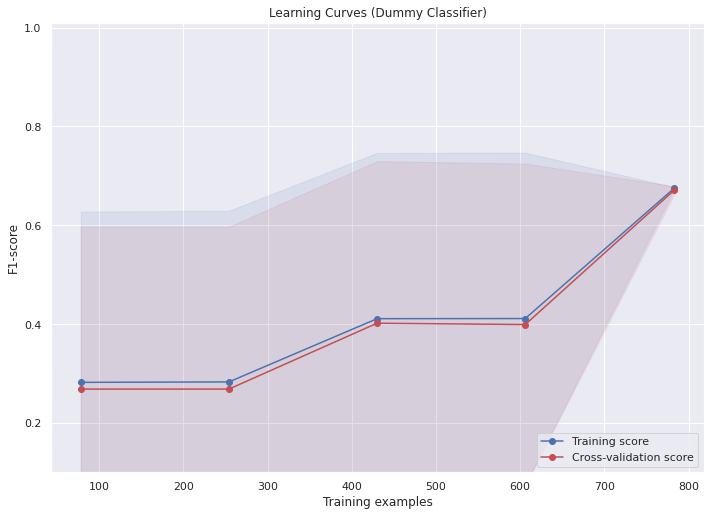

In [ ]:
x, y = xtrain_tfidf, ytrain
# Use cross validation with 5 splits, 20% test subset size each time
title = "Learning Curves (Dummy Classifier)"
score = "Training score"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, score, x, y, (0.1, 1.01), cv=cv, n_jobs=-1)
plt.show()

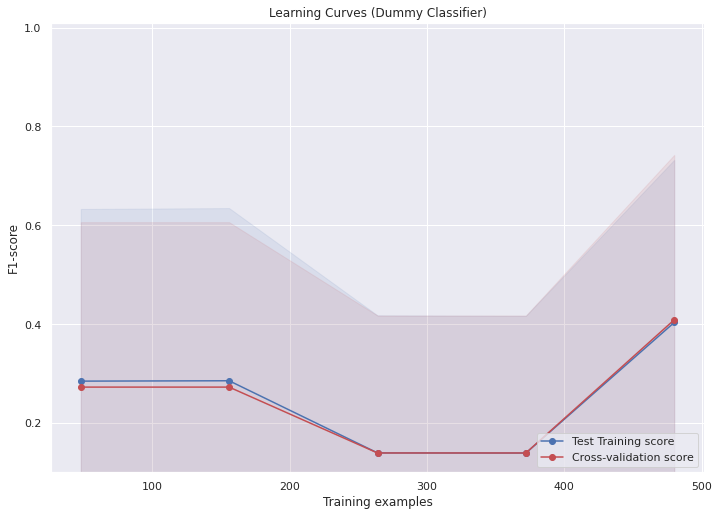

In [ ]:
x, y = xtest_tfidf, ytest
# Use cross validation with 5 splits, 20% test subset size each time
title = "Learning Curves (Dummy Classifier)"
score = "Test Training score"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, score, x, y, (0.1, 1.01), cv=cv, n_jobs=-1)
plt.show()

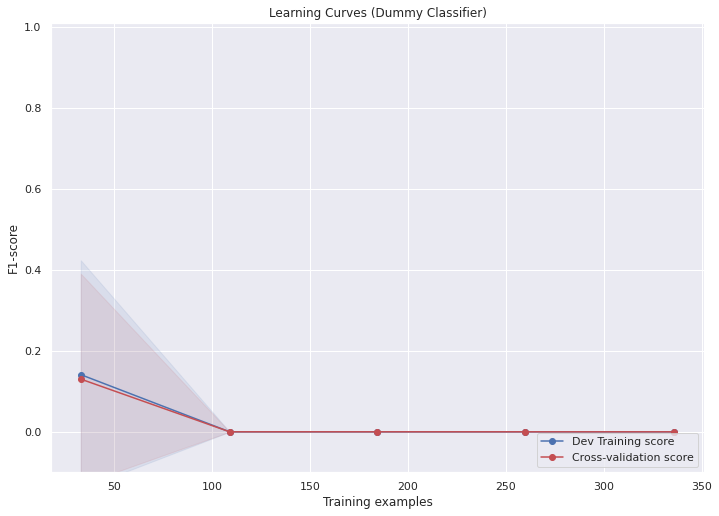

In [ ]:
x, y = xdev_tfidf, ydev
# Use cross validation with 5 splits, 20% test subset size each time
title = "Learning Curves (Dummy Classifier)"
score = "Dev Training score"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, score, x, y, (-0.1, 1.01), cv=cv, n_jobs=-1)
plt.show()

## Logistic Regression

>Hyperparameter Tuning

In [ ]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression

best_score = 0

for c in np.linspace(0.1, 1, 10):
  for solv in ['liblinear','lbfgs','saga',"newton-cg"]:
      for iter in [10,50,100,500,1000]:
        for l1 in np.linspace(0.1, 1, 10):

          # Train
          clf = LogisticRegression(solver=solv,C=c,max_iter=iter,l1_ratio=l1,random_state=40)
          clf.fit(xtrain_tfidf, ytrain)

          # Evaluate
          predictions_dev = clf.predict(xdev_tfidf)
          score = f1_score(ydev, predictions_dev)
          #print("for C=",round(c,1),"solver=",solv,"iterations",iter)
          #print("dev f1-score: {:.2f}% \n".format(score*100))
          if score > best_score:
                  best_score = score
                  best_parameters = {'C': round(c,2),"Solver":solv,"Iterations":iter,"l1":l1}

print("Best score: {:.2f}%".format(best_score*100))
print("Optimal Number for C: {}".format(best_parameters))

Best score: 83.95%
Optimal Number for C: {'C': 1.0, 'Solver': 'lbfgs', 'Iterations': 10, 'l1': 0.1}


>Logistic Regression Model Implemetation

Training took: 0.017087459564208984 seconds 

Train f1-score: 98.21%

Confusion Matrix for train data:


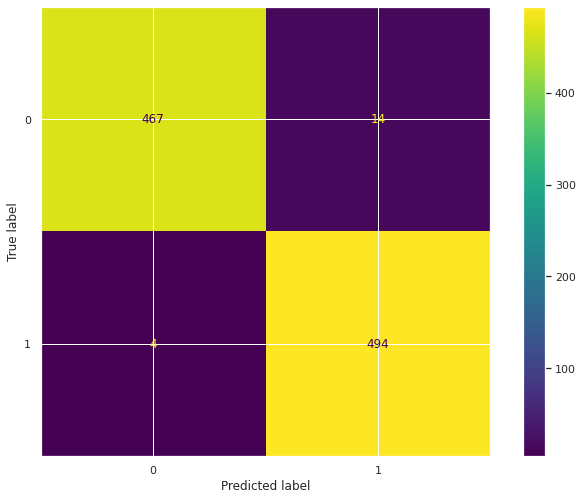

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

# Train
# Solver -- Algorithm to use in the optimization problem.

clf = LogisticRegression(solver='lbfgs',C=1,max_iter=10,l1_ratio=0.1,random_state=40)
start_time = time.time()
clf.fit(xtrain_tfidf, ytrain)

print("Training took: {} seconds \n".format(time.time() - start_time))

# Evaluate
predictions = clf.predict(xtrain_tfidf)
score = f1_score(ytrain,predictions)
print("Train f1-score: {:.2f}%".format(score*100))


print("\nConfusion Matrix for train data:")
ConfusionMatrixDisplay.from_estimator(clf, xtrain_tfidf, ytrain, values_format = '.0f')

Test f1-score: 85.26% 

Confusion Matrix for test data:


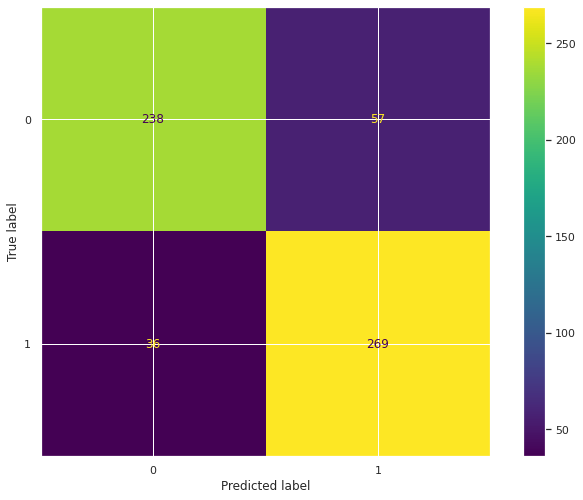

In [ ]:
predictions_test = clf.predict(xtest_tfidf)
score = f1_score(ytest, predictions_test)
print("Test f1-score: {:.2f}% \n".format(score*100))

print("Confusion Matrix for test data:")
ConfusionMatrixDisplay.from_estimator(clf, xtest_tfidf, ytest, values_format = '.0f')

Dev f1-score: 83.95% 

Confusion Matrix for dev data:


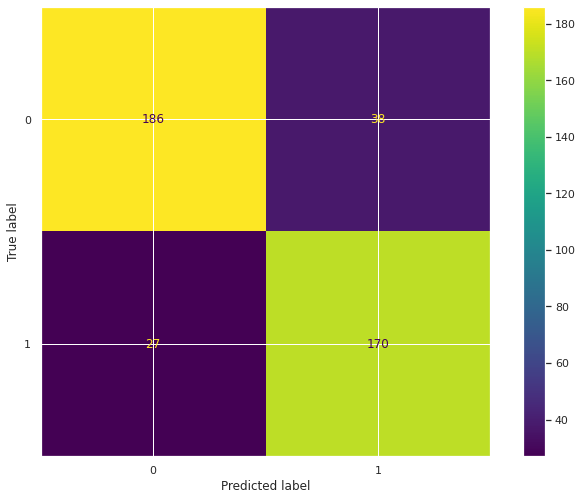

In [ ]:
predictions_dev = clf.predict(xdev_tfidf)
score = f1_score(ydev,predictions_dev)
print("Dev f1-score: {:.2f}% \n".format(score*100))

print("Confusion Matrix for dev data:")
ConfusionMatrixDisplay.from_estimator(clf, xdev_tfidf, ydev, values_format = '.0f')

>Classification Report per Data Set

In [ ]:
from sklearn import metrics

print("Classification Report for Train Set: \n",metrics.classification_report(ytrain,predictions))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Test Set: \n",metrics.classification_report(ytest,predictions_test))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Dev Set: \n",metrics.classification_report(ydev,predictions_dev))

Classification Report for Train Set: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       481
           1       0.97      0.99      0.98       498

    accuracy                           0.98       979
   macro avg       0.98      0.98      0.98       979
weighted avg       0.98      0.98      0.98       979

----------------------------------------------------------------------


Classification Report for Test Set: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       295
           1       0.83      0.88      0.85       305

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

----------------------------------------------------------------------


Classification Report for Dev Set: 
               precision    recall  f1-score   support

           0       0.87      0.

>Presision-Recall AUC Score (per Class and per Data Set) and Average Presision-Recall AUC Score Calculation (per Data Set)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


#for train set
pred_train = clf.predict_proba(xtrain_tfidf)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
auc_train_neg = auc(recall, precision)

precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
auc_train=(auc_train_neg+auc_train_pos)/2

print("(Train Set): Presision-Recall AUC Score for the Negative Class is:",auc_train_neg)
print("(Train Set): Presision-Recall AUC Score for the Positive Class is:",auc_train_pos)
print("(Train Set): Average Presision-Recall AUC Score is:",auc_train)


#for test set
pred_test = clf.predict_proba(xtest_tfidf)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)

precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
auc_test=(auc_test_neg+auc_test_pos)/2

print("")
print("(Test Set): Presision-Recall AUC Score for the Negative Class is:",auc_test_neg)
print("(Test Set): Presision-Recall AUC Score for the Positive Class is:",auc_test_pos)
print("(Test Set): Average Presision-Recall AUC Score is:",auc_test)


#for dev set
pred_dev = clf.predict_proba(xdev_tfidf)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)

precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
auc_dev=(auc_dev_neg+auc_dev_pos)/2

print("")
print("(Dev Set): Presision-Recall AUC Score for the Negative Class is:",auc_dev_neg)
print("(Dev Set): Presision-Recall AUC Score for the Positive Class is:",auc_dev_pos)
print("(Dev Set): Average Presision-Recall AUC Score is:",auc_dev)


(Train Set): Presision-Recall AUC Score for the Negative Class is: 0.9983315437368695
(Train Set): Presision-Recall AUC Score for the Positive Class is: 0.9986340238813857
(Train Set): Average Presision-Recall AUC Score is: 0.9984827838091276

(Test Set): Presision-Recall AUC Score for the Negative Class is: 0.9256098728103688
(Test Set): Presision-Recall AUC Score for the Positive Class is: 0.9359910283125624
(Test Set): Average Presision-Recall AUC Score is: 0.9308004505614655

(Dev Set): Presision-Recall AUC Score for the Negative Class is: 0.9381682228765827
(Dev Set): Presision-Recall AUC Score for the Positive Class is: 0.9221404358339274
(Dev Set): Average Presision-Recall AUC Score is: 0.930154329355255


###AUC Diagrams

AUC train set curves


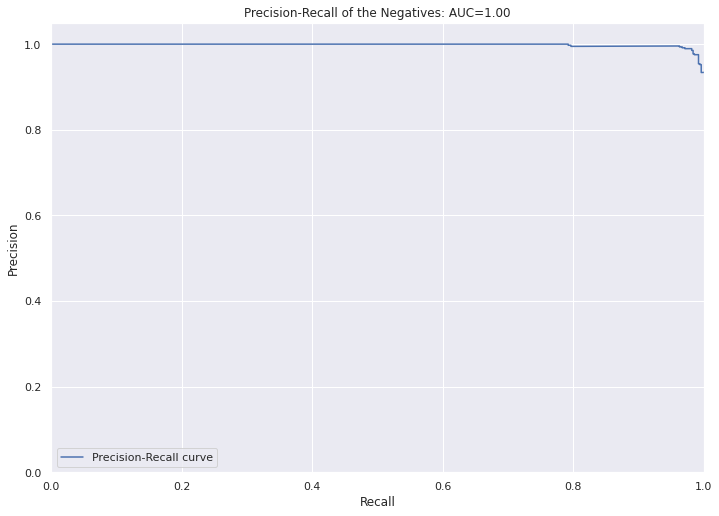

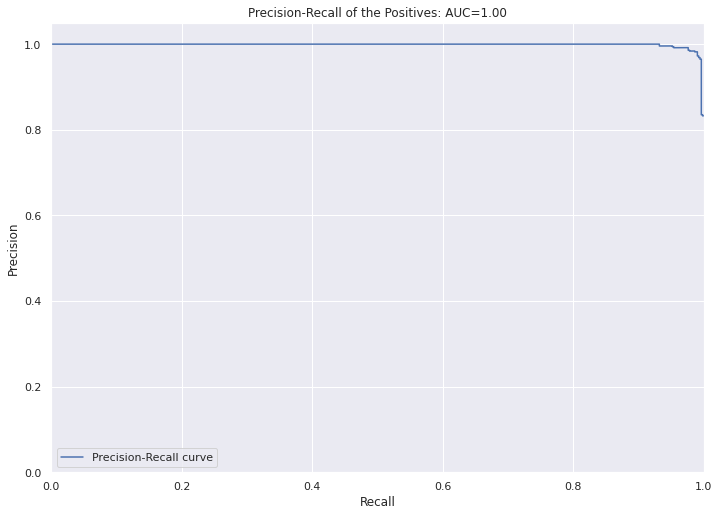

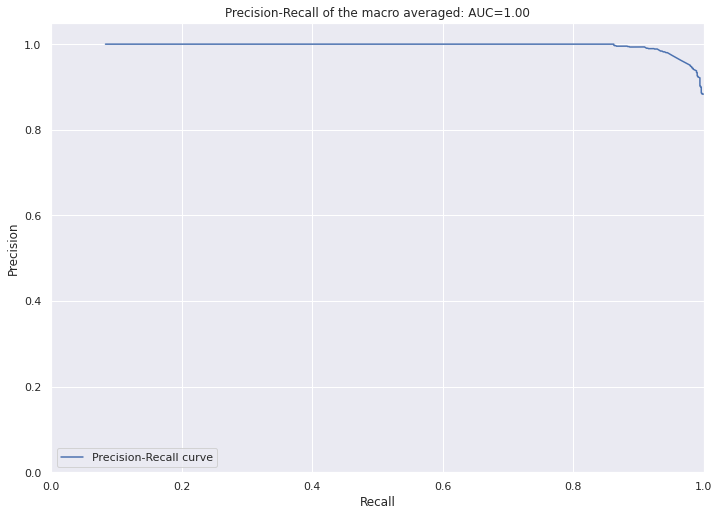

In [ ]:
# Precision-Recall train set curves
pred_train = clf.predict_proba(xtrain_tfidf)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
auc_train_neg = auc(recall, precision)
p1 = precision
r1 = recall


print("AUC train set curves")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Negatives: AUC=%0.2f' % (auc_train_neg))
plt.legend(loc="lower left")
plt.show()


precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
p2 = precision
r2 = recall

print("")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Positives: AUC=%0.2f' % (auc_train_pos))
plt.legend(loc="lower left")
plt.show()


if (len(p1)>len(p2)): 
  macroP=(p1[:len(p2)]+p2)/2
  macroR=(r1[:len(r2)]+r2)/2
else:
  macroP=(p1+p2[:len(p1)])/2
  macroR=(r1+r2[:len(r1)])/2

auc_train=(auc_train_neg+auc_train_pos)/2

print("")
plt.plot(macroR, macroP, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the macro averaged: AUC=%0.2f' % (auc_train))
plt.legend(loc="lower left")
plt.show()


AUC test set curves


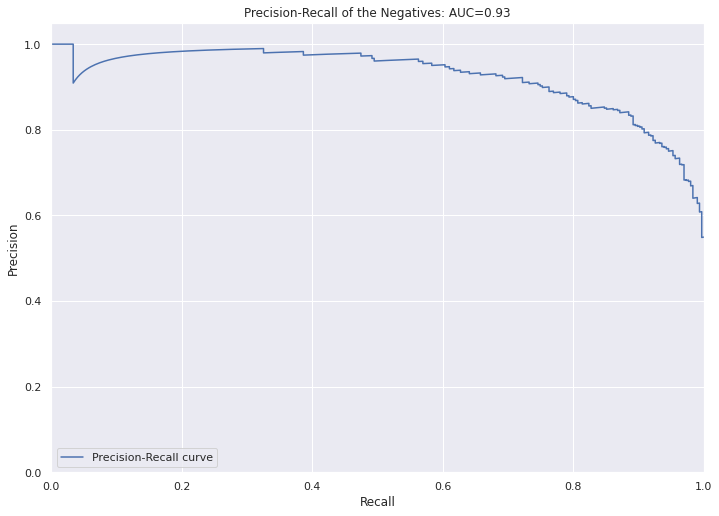

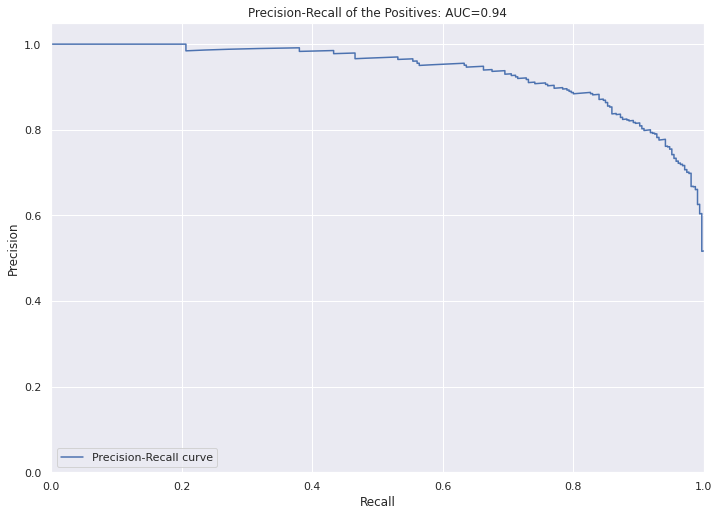

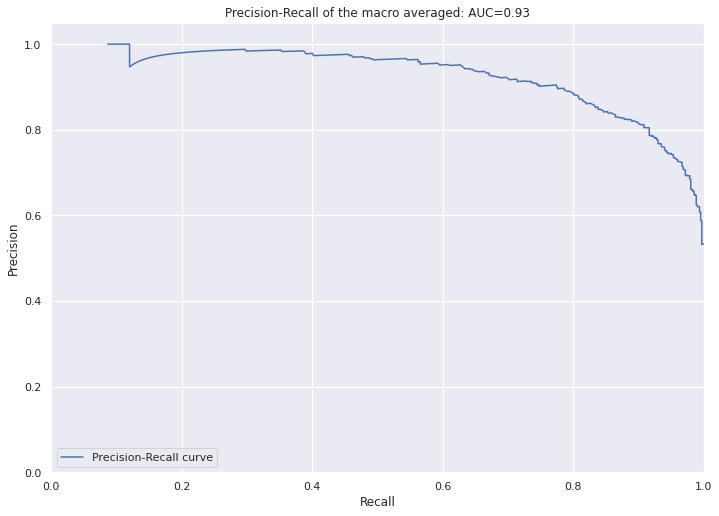

In [ ]:
# Precision-Recall test set curves
pred_test = clf.predict_proba(xtest_tfidf)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)
p1 = precision
r1 = recall

print("AUC test set curves")

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Negatives: AUC=%0.2f' % (auc_test_neg))
plt.legend(loc="lower left")
plt.show()

precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
p2 = precision
r2 = recall

print("")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Positives: AUC=%0.2f' % (auc_test_pos))
plt.legend(loc="lower left")
plt.show()


if (len(p1)>len(p2)): 
  macroP=(p1[:len(p2)]+p2)/2
  macroR=(r1[:len(r2)]+r2)/2
else:
  macroP=(p1+p2[:len(p1)])/2
  macroR=(r1+r2[:len(r1)])/2

auc_test=(auc_test_neg+auc_test_pos)/2

print("")
plt.plot(macroR, macroP, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the macro averaged: AUC=%0.2f' % (auc_test))
plt.legend(loc="lower left")
plt.show()

AUC dev set curves


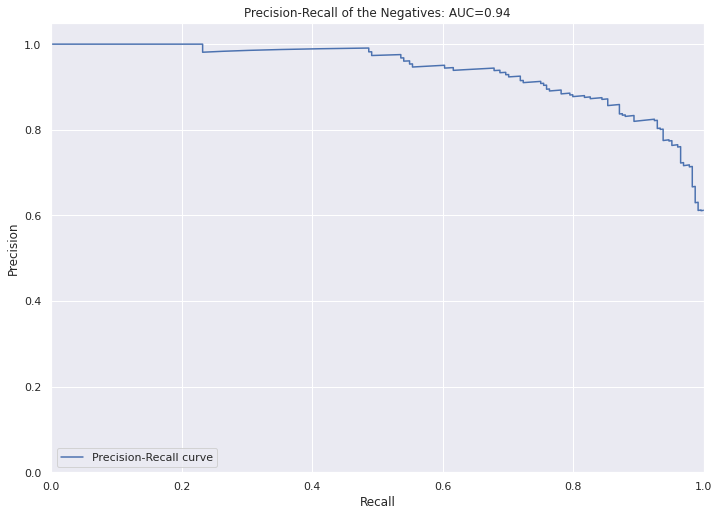

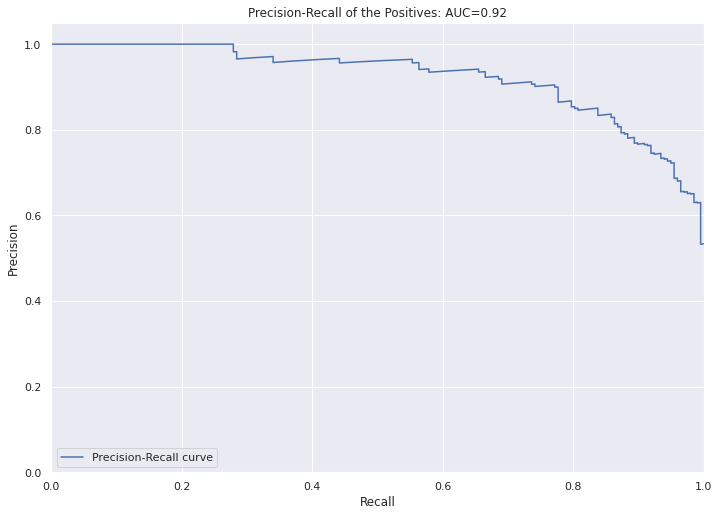

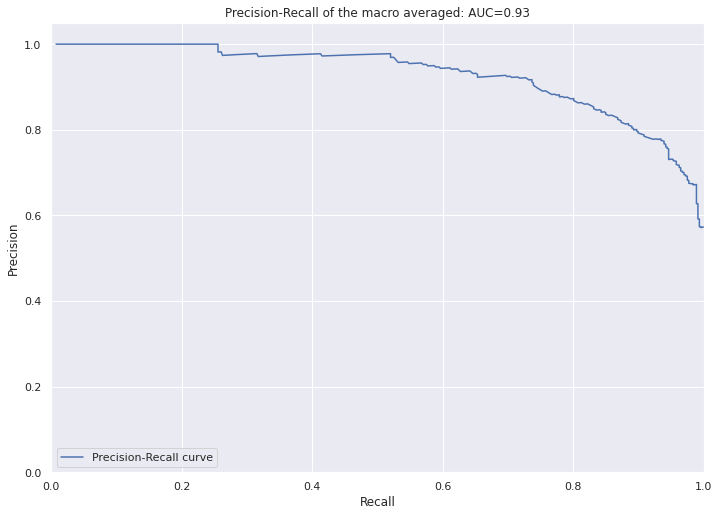

In [ ]:
# Precision-Recall dev set curves
pred_dev = clf.predict_proba(xdev_tfidf)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)
p1 = precision
r1 = recall


print("AUC dev set curves")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Negatives: AUC=%0.2f' % (auc_dev_neg))
plt.legend(loc="lower left")
plt.show()

precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
p2 = precision
r2 = recall

print("")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Positives: AUC=%0.2f' % (auc_dev_pos))
plt.legend(loc="lower left")
plt.show()


if (len(p1)>len(p2)): 
  macroP=(p1[:len(p2)]+p2)/2
  macroR=(r1[:len(r2)]+r2)/2
else:
  macroP=(p1+p2[:len(p1)])/2
  macroR=(r1+r2[:len(r1)])/2

auc_dev=(auc_dev_neg+auc_dev_pos)/2

print("")
plt.plot(macroR, macroP, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the macro averaged: AUC=%0.2f' % (auc_dev))
plt.legend(loc="lower left")
plt.show()

###Learning Curves

In [ ]:
# Learning curves with cross-validtion
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
import seaborn as sns

def plot_learning_curve(estimator, title,score, X, y, ylim=None, cv=None,n_jobs=1, train_sizes=np.linspace(.1, 1.0, 8)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1-score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,scoring='f1', train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    #plt.show()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,train_scores_mean + train_scores_std, alpha=0.1,color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,test_scores_mean + test_scores_std, alpha=0.1, color="r")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",label=score)
    plt.plot(train_sizes, test_scores_mean, 'o-', color="r",label="Cross-validation score")
    plt.legend(loc="lower right")
    return plt

estimator = LogisticRegression(solver='lbfgs',C=1,max_iter=10,l1_ratio=0.1,random_state=40)

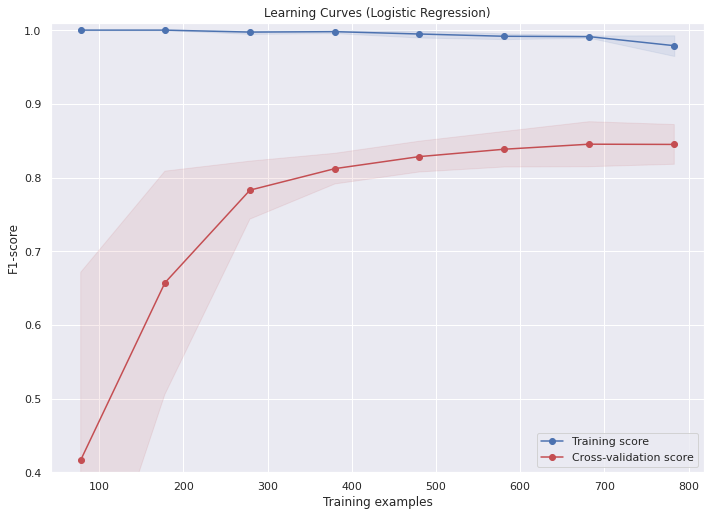

In [ ]:
x, y = xtrain_tfidf, ytrain
# Use cross validation with 5 splits, 20% test subset size each time
title = "Learning Curves (Logistic Regression)"
score = "Training score"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title,score, x, y, (0.4, 1.01), cv=cv, n_jobs=-1)
plt.show()

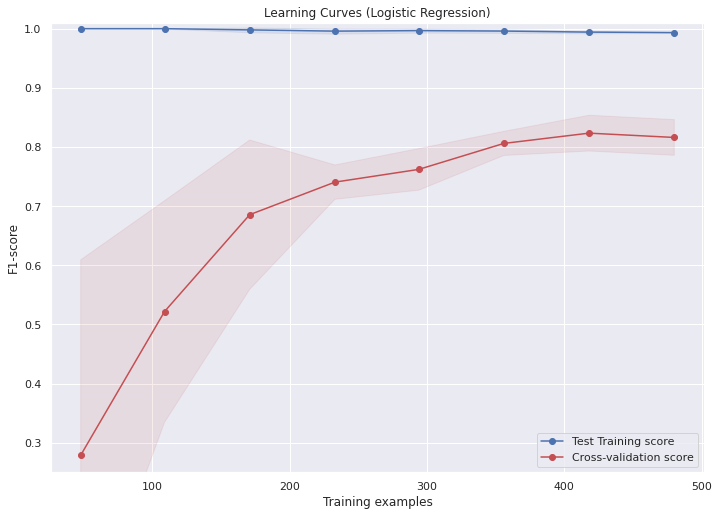

In [ ]:
x, y = xtest_tfidf, ytest
# Use cross validation with 5 splits, 20% test subset size each time
title = "Learning Curves (Logistic Regression)"
score = "Test Training score"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title,score, x, y, (0.25, 1.01), cv=cv, n_jobs=-1)
plt.show()

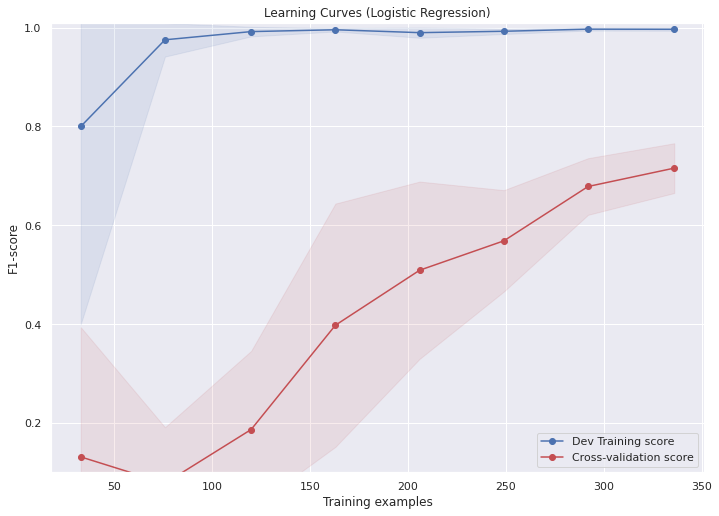

In [ ]:
x, y = xdev_tfidf, ydev
# Use cross validation with 5 splits, 20% test subset size each time
title = "Learning Curves (Logistic Regression)"
score = "Dev Training score"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(estimator, title, score, x, y, (0.1, 1.01), cv=cv, n_jobs=-1)
plt.show()

## KNN 

>Hyperparameter Tuning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score


best_score = 0

for kappa in list(range(1, 21)):
  for wts in ["uniform", "distance"]:
    # Train
    clf = KNeighborsClassifier(n_neighbors=kappa,weights=wts)
    clf.fit(xtrain_tfidf, ytrain)

    # Evaluate
    predictions = clf.predict(xtrain_tfidf)
    score = f1_score(ytrain,predictions)
    predictions_dev = clf.predict(xdev_tfidf)
    score = f1_score(ydev, predictions_dev)
    #print("for k=",kappa)
    #print("Test f1-score: {:.2f}% \n".format(score*100))
    if score > best_score:
              best_score = score
              best_parameters = {'neighbours': kappa,"wights":wts}

print("Best score: {:.2f}%".format(best_score*100))
print("Optimal Number of Neighbours: {}".format(best_parameters))

Best score: 75.34%
Optimal Number of Neighbours: {'neighbours': 18, 'wights': 'distance'}


>KNN Model Implemetation

Training took: 0.0012252330780029297 seconds 

Train f1-score: 100.00%

Confusion Matrix for train data:


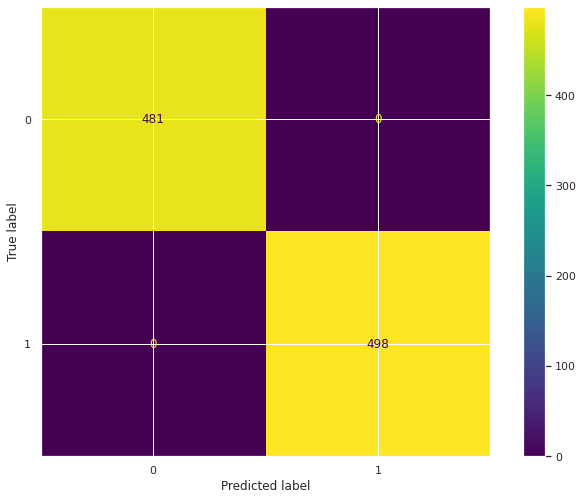

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Train
clf = KNeighborsClassifier(n_neighbors=18,weights="distance")
start_time = time.time()
clf.fit(xtrain_tfidf, ytrain)
print("Training took: {} seconds \n".format(time.time() - start_time))

# Evaluate
predictions = clf.predict(xtrain_tfidf)
score = f1_score(ytrain,predictions)
print("Train f1-score: {:.2f}%".format(score*100))

print("\nConfusion Matrix for train data:")
ConfusionMatrixDisplay.from_estimator(clf, xtrain_tfidf, ytrain, values_format = '.0f')

Test f1-score: 77.96% 

Confusion Matrix for test data:


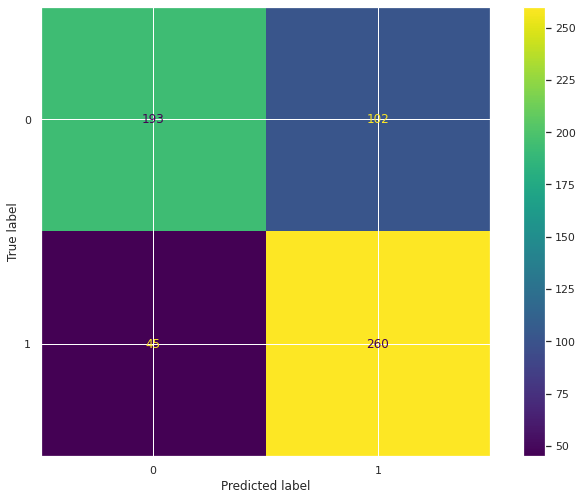

In [ ]:
predictions_test = clf.predict(xtest_tfidf)
score = f1_score(ytest, predictions_test)
print("Test f1-score: {:.2f}% ".format(score*100))

print("\nConfusion Matrix for test data:")
ConfusionMatrixDisplay.from_estimator(clf, xtest_tfidf, ytest, values_format = '.0f')

Dev f1-score: 75.34% 


Confusion Matrix for dev data:


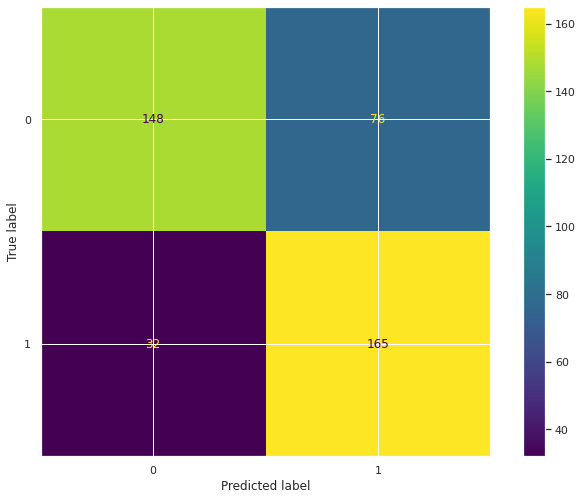

In [ ]:
predictions_dev = clf.predict(xdev_tfidf)
score = f1_score(ydev,predictions_dev)
print("Dev f1-score: {:.2f}% \n".format(score*100))

print("\nConfusion Matrix for dev data:")
ConfusionMatrixDisplay.from_estimator(clf, xdev_tfidf, ydev, values_format = '.0f')

>Classification Report per Data Set

In [ ]:
from sklearn import metrics

print("Classification Report for Train Set: \n",metrics.classification_report(ytrain,predictions))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Test Set: \n",metrics.classification_report(ytest,predictions_test))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Dev Set: \n",metrics.classification_report(ydev,predictions_dev))


Classification Report for Train Set: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       481
           1       1.00      1.00      1.00       498

    accuracy                           1.00       979
   macro avg       1.00      1.00      1.00       979
weighted avg       1.00      1.00      1.00       979

----------------------------------------------------------------------


Classification Report for Test Set: 
               precision    recall  f1-score   support

           0       0.81      0.65      0.72       295
           1       0.72      0.85      0.78       305

    accuracy                           0.76       600
   macro avg       0.76      0.75      0.75       600
weighted avg       0.76      0.76      0.75       600

----------------------------------------------------------------------


Classification Report for Dev Set: 
               precision    recall  f1-score   support

           0       0.82      0.

>Presision-Recall AUC Score (per Class and per Data Set) and Average Presision-Recall AUC Score Calculation (per Data Set)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#for train set

pred_train = clf.predict_proba(xtrain_tfidf)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
auc_train_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
auc_train=(auc_train_neg+auc_train_pos)/2

print("(Train Set): Presision-Recall AUC Score for the Negative Class is:",auc_train_neg)
print("(Train Set): Presision-Recall AUC Score for the Positive Class is:",auc_train_pos)
print("(Train Set): Average Presision-Recall AUC Score is:",auc_train)

#for test set

pred_test = clf.predict_proba(xtest_tfidf)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
auc_test=(auc_test_neg+auc_test_pos)/2
print("")
print("(Test Set): Presision-Recall AUC Score for the Negative Class is:",auc_test_neg)
print("(Test Set): Presision-Recall AUC Score for the Positive Class is:",auc_test_pos)
print("(Test Set): Average Presision-Recall AUC Score is:",auc_test)

#for dev set

pred_dev = clf.predict_proba(xdev_tfidf)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
auc_dev=(auc_dev_neg+auc_dev_pos)/2
print("")
print("(Dev Set): Presision-Recall AUC Score for the Negative Class is:",auc_dev_neg)
print("(Dev Set): Presision-Recall AUC Score for the Positive Class is:",auc_dev_pos)
print("(Dev Set): Average Presision-Recall AUC Score is:",auc_dev)


(Train Set): Presision-Recall AUC Score for the Negative Class is: 1.0
(Train Set): Presision-Recall AUC Score for the Positive Class is: 1.0
(Train Set): Average Presision-Recall AUC Score is: 1.0

(Test Set): Presision-Recall AUC Score for the Negative Class is: 0.8285799204266174
(Test Set): Presision-Recall AUC Score for the Positive Class is: 0.8515893236499636
(Test Set): Average Presision-Recall AUC Score is: 0.8400846220382905

(Dev Set): Presision-Recall AUC Score for the Negative Class is: 0.8469471146978418
(Dev Set): Presision-Recall AUC Score for the Positive Class is: 0.8022677000880754
(Dev Set): Average Presision-Recall AUC Score is: 0.8246074073929586


###AUC Diagrams

AUC train set curves


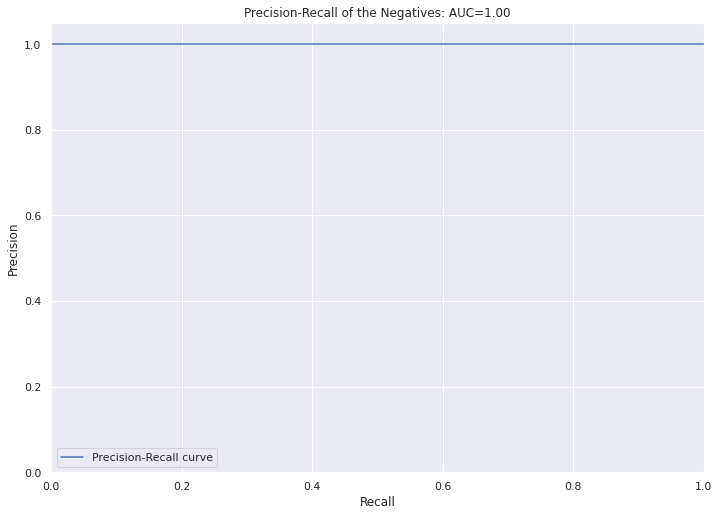

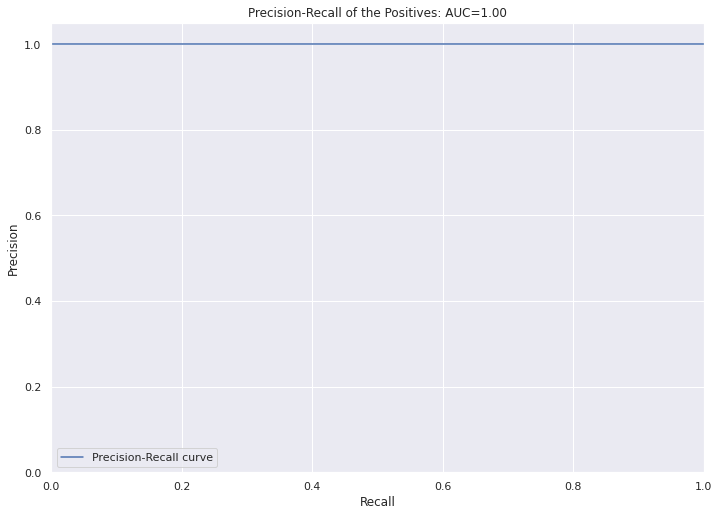

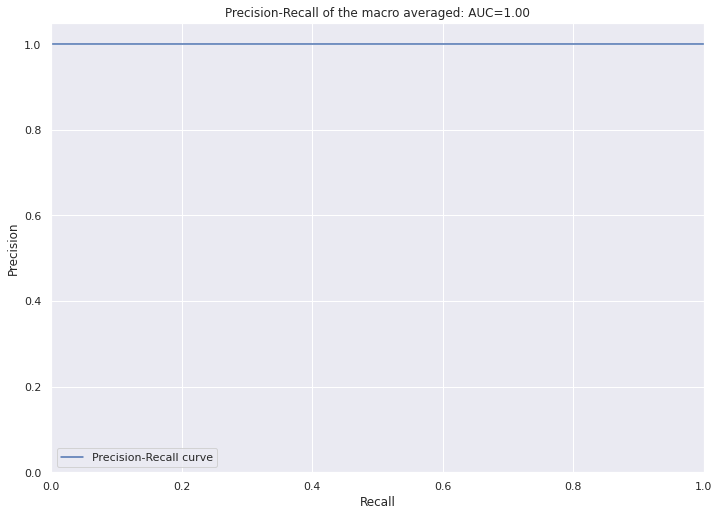

In [ ]:
# Precision-Recall train set curves
pred_train = clf.predict_proba(xtrain_tfidf)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
auc_train_neg = auc(recall, precision)
p1 = precision
r1 = recall


print("AUC train set curves")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Negatives: AUC=%0.2f' % (auc_train_neg))
plt.legend(loc="lower left")
plt.show()


precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
p2 = precision
r2 = recall

print("")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Positives: AUC=%0.2f' % (auc_train_pos))
plt.legend(loc="lower left")
plt.show()


if (len(p1)>len(p2)): 
  macroP=(p1[:len(p2)]+p2)/2
  macroR=(r1[:len(r2)]+r2)/2
else:
  macroP=(p1+p2[:len(p1)])/2
  macroR=(r1+r2[:len(r1)])/2

auc_train=(auc_train_neg+auc_train_pos)/2

print("")
plt.plot(macroR, macroP, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the macro averaged: AUC=%0.2f' % (auc_train))
plt.legend(loc="lower left")
plt.show()


AUC test set curves


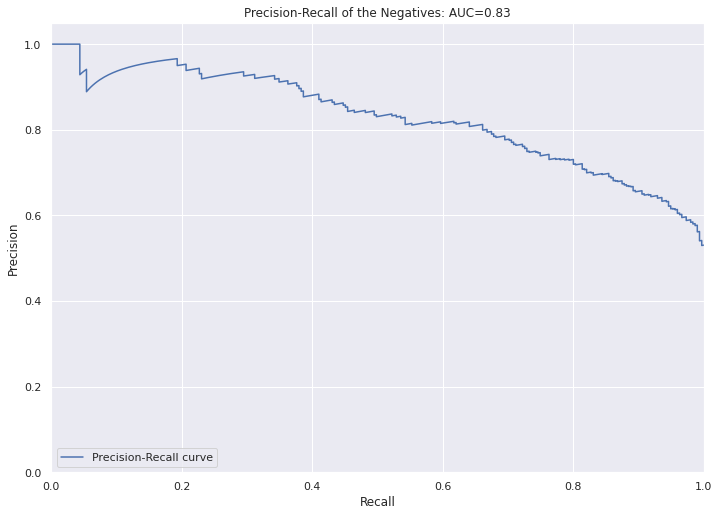

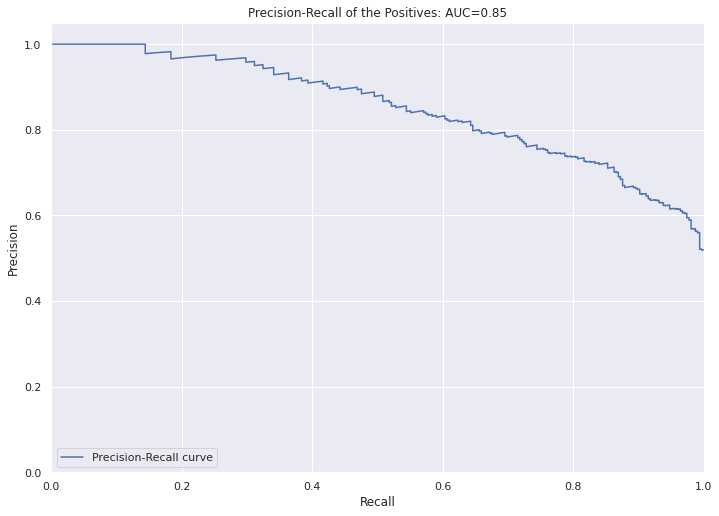

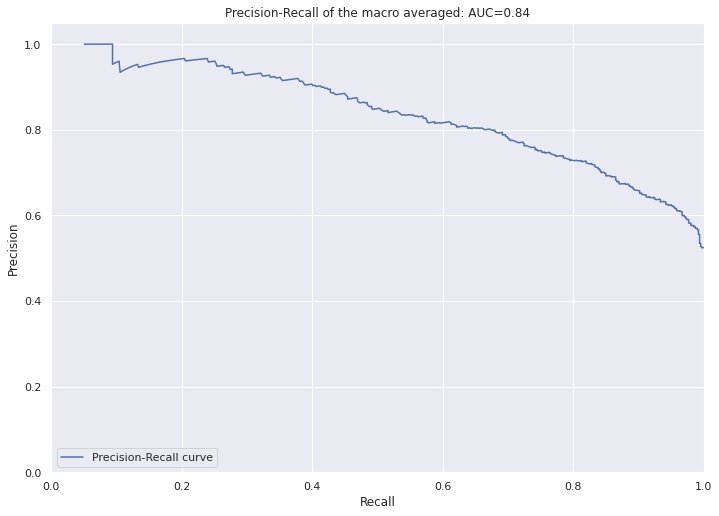

In [ ]:
# Precision-Recall test set curves
pred_test = clf.predict_proba(xtest_tfidf)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)
p1 = precision
r1 = recall

print("AUC test set curves")

plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Negatives: AUC=%0.2f' % (auc_test_neg))
plt.legend(loc="lower left")
plt.show()

precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
p2 = precision
r2 = recall

print("")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Positives: AUC=%0.2f' % (auc_test_pos))
plt.legend(loc="lower left")
plt.show()


if (len(p1)>len(p2)): 
  macroP=(p1[:len(p2)]+p2)/2
  macroR=(r1[:len(r2)]+r2)/2
else:
  macroP=(p1+p2[:len(p1)])/2
  macroR=(r1+r2[:len(r1)])/2

auc_test=(auc_test_neg+auc_test_pos)/2


print("")
plt.plot(macroR, macroP, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the macro averaged: AUC=%0.2f' % (auc_test))
plt.legend(loc="lower left")
plt.show()


AUC dev set curves


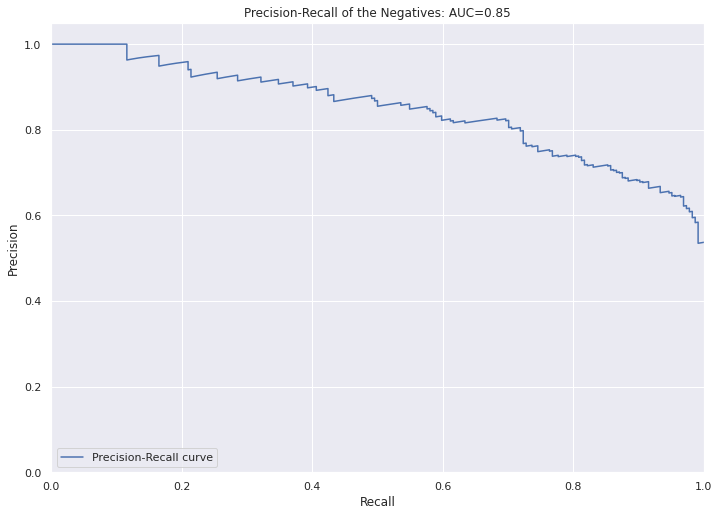

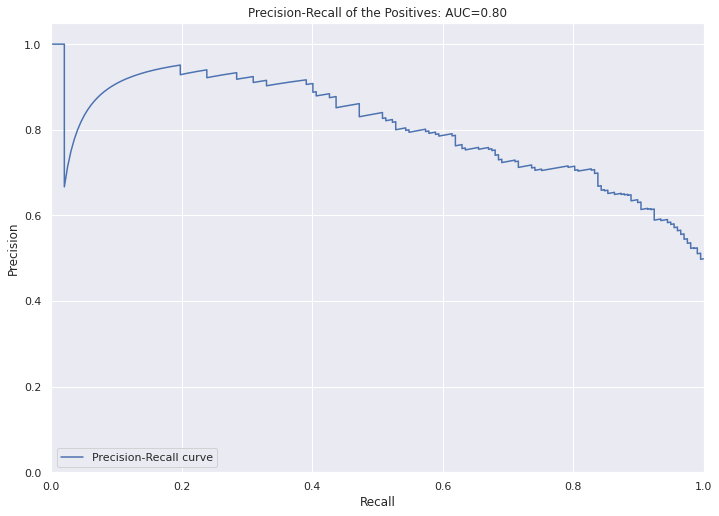

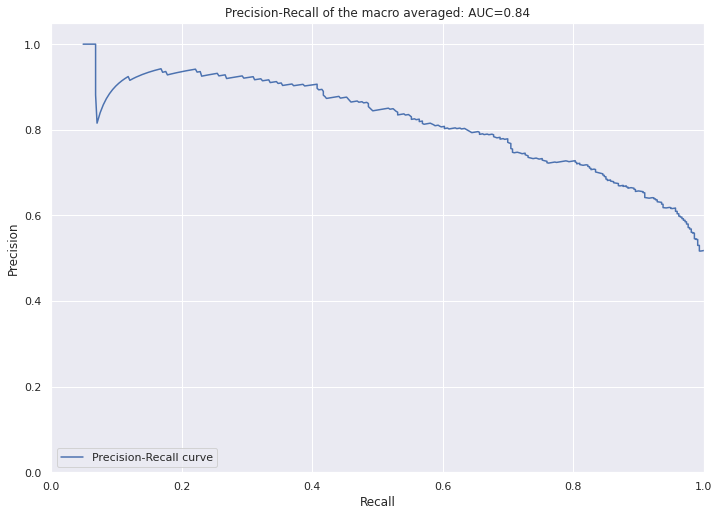

In [ ]:
# Precision-Recall dev set curves
pred_dev = clf.predict_proba(xdev_tfidf)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)
p1 = precision
r1 = recall


print("AUC dev set curves")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Negatives: AUC=%0.2f' % (auc_dev_neg))
plt.legend(loc="lower left")
plt.show()

precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
p2 = precision
r2 = recall

print("")
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the Positives: AUC=%0.2f' % (auc_dev_pos))
plt.legend(loc="lower left")
plt.show()


if (len(p1)>len(p2)): 
  macroP=(p1[:len(p2)]+p2)/2
  macroR=(r1[:len(r2)]+r2)/2
else:
  macroP=(p1+p2[:len(p1)])/2
  macroR=(r1+r2[:len(r1)])/2

auc_dev=(auc_test_neg+auc_test_pos)/2


print("")
plt.plot(macroR, macroP, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall of the macro averaged: AUC=%0.2f' % (auc_dev))
plt.legend(loc="lower left")
plt.show()


###Learning Curves

(95, 5000)
(95,)
(95, 5000)
(95,)
(190, 5000)
(190,)
(285, 5000)
(285,)
(380, 5000)
(380,)
(475, 5000)
(475,)
(570, 5000)
(570,)
(665, 5000)
(665,)
(760, 5000)
(760,)
(855, 5000)
(855,)


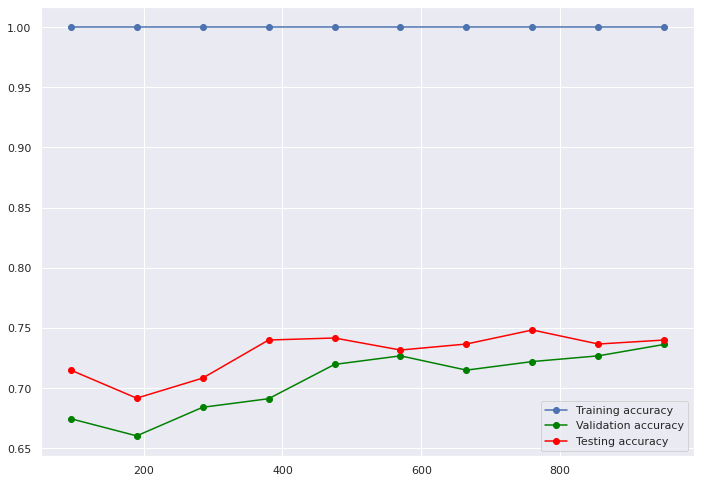

In [ ]:
def custom_learning_curve(x_train, y_train,x_val, y_val, x_test, y_test,n_splits):

    split_size = int(len(x_train) / n_splits)
    x_splits = np.split(x_train, n_splits) # must be equal division
    y_splits = np.split(y_train, n_splits)

    train_accuracies = list()
    val_accuracies = list()
    test_accuracies = list()

    curr_x = x_splits[0]
    curr_y = y_splits[0]
    print(curr_x.shape)
    print(curr_y.shape)
    knn = KNeighborsClassifier(n_neighbors=18,weights="distance") 
    knn.fit(curr_x, curr_y)

    train_accuracies.append(accuracy_score(curr_y, knn.predict(curr_x)))
    val_accuracies.append(accuracy_score(y_val, knn.predict(x_val))) 
    test_accuracies.append(accuracy_score(y_test, knn.predict(x_test)))

    for i in range(1, len(x_splits)):
        knn = KNeighborsClassifier(n_neighbors=18,weights="distance")

        print(curr_x.shape)
        print(curr_y.shape)
        curr_x = np.concatenate((curr_x, x_splits[i]), axis=0)
        curr_y = np.concatenate((curr_y, y_splits[i]), axis=0)

        knn.fit(curr_x, curr_y)
    
        train_accuracies.append(accuracy_score(curr_y, knn.predict(curr_x)))
        val_accuracies.append(accuracy_score(y_val, knn.predict(x_val)))
        test_accuracies.append(accuracy_score(y_test, knn.predict(x_test)))
  
    plt.plot(list(range(split_size, len(x_train) + split_size, split_size)), train_accuracies, 'o-', color="b",label="Training accuracy")
    plt.plot(list(range(split_size, len(x_train) + split_size, split_size)), val_accuracies, 'o-', color="green",label="Validation accuracy")
    plt.plot(list(range(split_size, len(x_train) + split_size, split_size)), test_accuracies, 'o-', color="red",label="Testing accuracy")

    plt.legend(loc="lower right")
    plt.show()

#Croped in order for the division to will be equal
xtrain_tfidf_array=xtrain_tfidf_array[:950]
ytrain=ytrain[:950]

custom_learning_curve(x_train=xtrain_tfidf_array, y_train=ytrain,x_val=xdev_tfidf.toarray(), y_val=ydev, x_test=xtest_tfidf.toarray(),y_test=ytest, n_splits=10)